# ***Email/SMS Spam Classifier***

In [52]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## ***Data Cleaning***

In [53]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.rename(columns={'v1':'value','v2':'sms'}, inplace=True)
df.head()

,value,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['value'] = encoder.fit_transform(df['value'])
df.head()

,value,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
df.duplicated().sum()

403

In [56]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

## ***Exploratory Data Analysis***

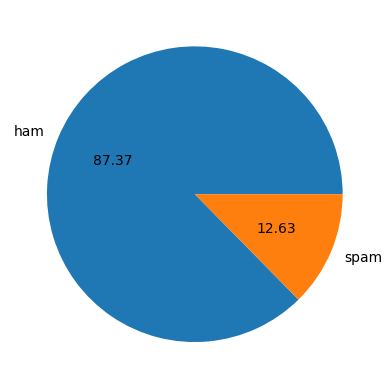

In [57]:
import matplotlib.pyplot as plt

plt.pie(df['value'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [58]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
df['numChar'] = df['sms'].apply(len)
df['numWords'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))
df['numSen'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,value,sms,numChar,numWords,numSen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [60]:
#overall decription of sms
df[['numChar','numWords','numSen']].describe()

,numChar,numWords,numSen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
#for ham messages only
df[df['value']==0][['numChar','numWords','numSen']].describe()

,numChar,numWords,numSen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
#for spam messages only
df[df['value']!=0][['numChar','numWords','numSen']].describe()

,numChar,numWords,numSen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='numChar', ylabel='Count'>

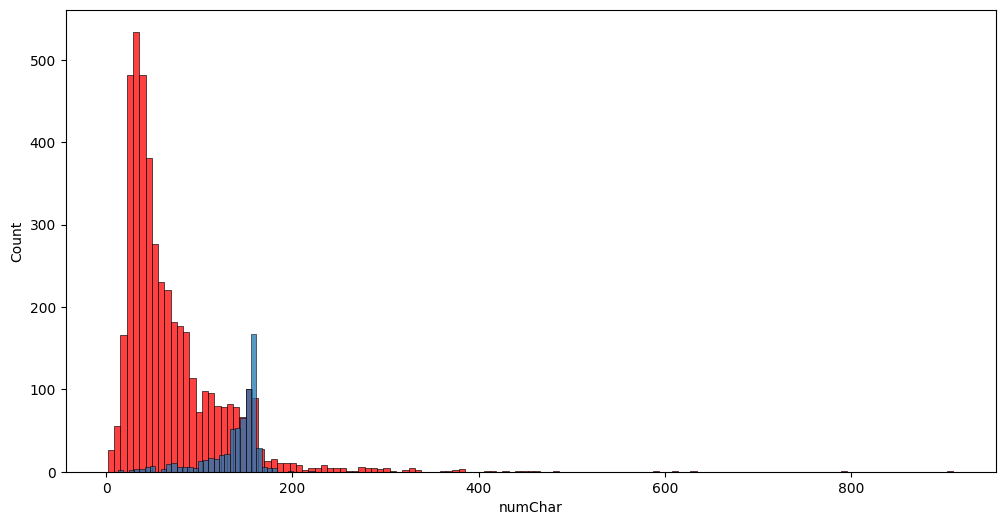

In [63]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['value']==0]['numChar'], color='red')
sns.histplot(df[df['value']==1]['numChar'])

<Axes: xlabel='numWords', ylabel='Count'>

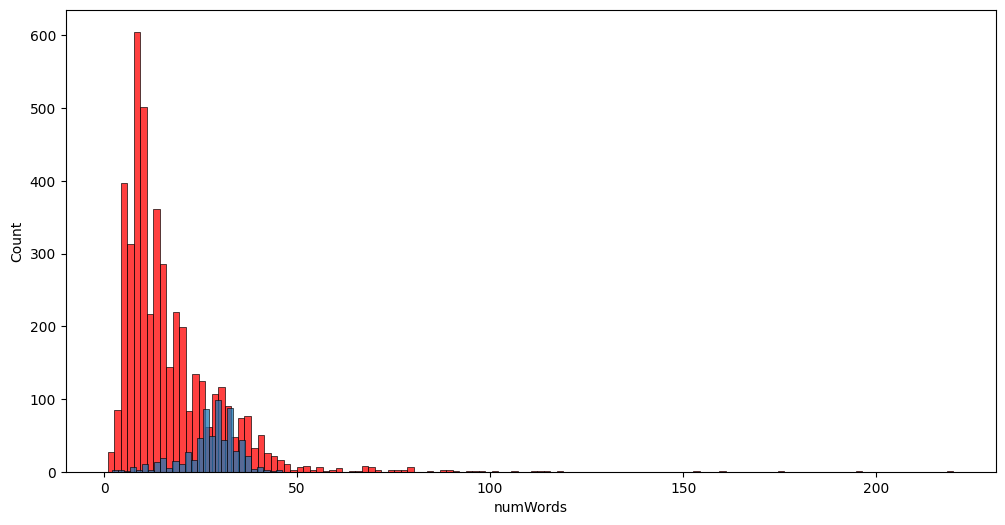

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['value']==0]['numWords'], color='red')
sns.histplot(df[df['value']==1]['numWords'])

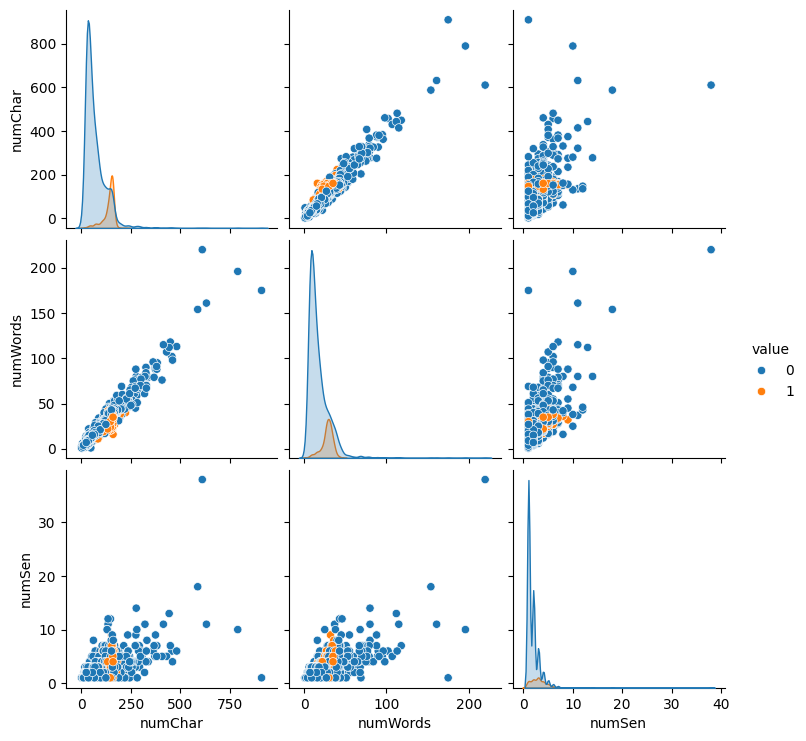

In [65]:
sns.pairplot(df, hue='value')

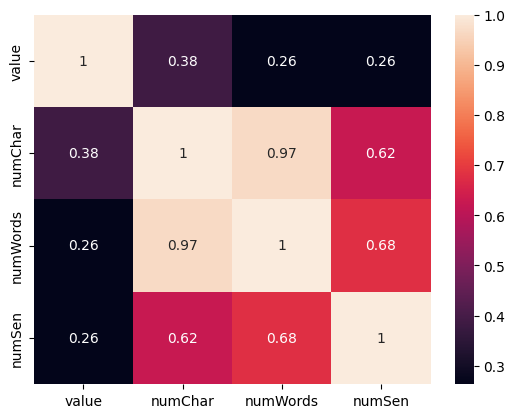

In [66]:
willUse = df['sms']
df.drop(columns='sms', inplace=True)
sns.heatmap(df.corr(), annot=True)
df['sms'] = willUse

## ***Data Preprocessing***

In [67]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()


def transformText(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  newText = []
  for i in text:
    if i.isalnum():
      newText.append(i)

  text = newText[:]
  newText.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      newText.append(ps.stem(i))
  return " ".join(newText)

transformText("I loved the YT lecture about Machinr Learning")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'love yt lectur machinr learn'

In [68]:
df['stemmedSMS'] = df['sms'].apply(transformText)
df.head()

,value,numChar,numWords,numSen,sms,stemmedSMS
0,0,111,24,2,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,29,8,2,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,61,15,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


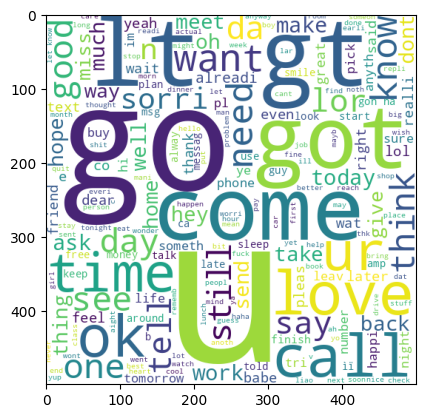

In [72]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

hamWC = wc.generate(df[df['value']==0]['stemmedSMS'].str.cat(sep=" "))
plt.imshow(hamWC)

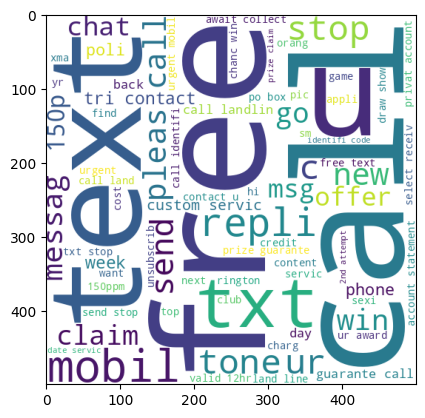

In [73]:
spamWC = wc.generate(df[df['value']!=0]['stemmedSMS'].str.cat(sep=" "))
plt.imshow(spamWC)

35404


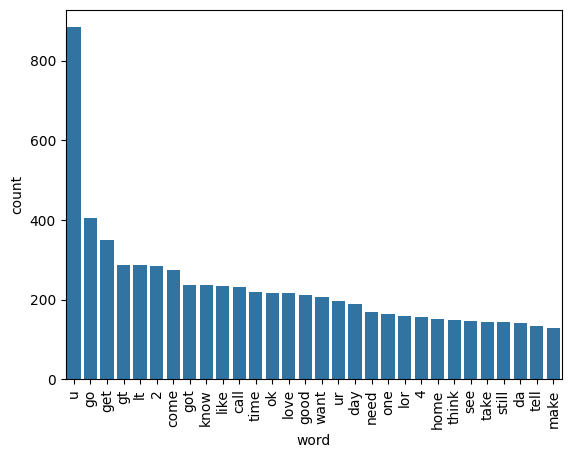

In [82]:
hams = []
for msg in df[df['value']==0]['stemmedSMS'].tolist():
  for word in msg.split():
    hams.append(word)

from collections import Counter
hamDF = pd.DataFrame(Counter(hams).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=hamDF)
plt.xticks(rotation='vertical')
plt.show()

9939


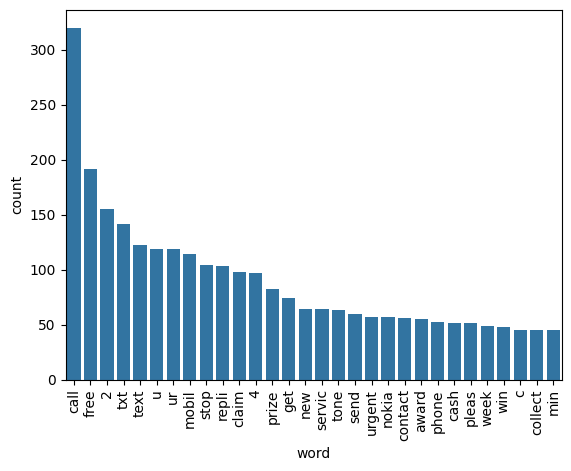

In [83]:
spams = []
for msg in df[df['value']!=0]['stemmedSMS'].tolist():
  for word in msg.split():
    spams.append(word)

spamDF = pd.DataFrame(Counter(spams).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spamDF)
plt.xticks(rotation='vertical')
plt.show()

## ***Building Model***

### ***Using Count Vectorizer(Bag Of Words)***

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

cv = CountVectorizer()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


X = cv.fit_transform(df['stemmedSMS']).toarray()

y = df['value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [91]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [92]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [93]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### ***Using TfidfVectorizer***

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer()

X = td.fit_transform(df['stemmedSMS']).toarray()

y = df['value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [95]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [96]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [97]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# We will go with tfidf and multinomial since it is giving best precision score
# Here we are considering precision score and not accuracy because here the data is imbalanced

## ***Model Improving***

In [98]:
td = TfidfVectorizer(max_features=3000)

X = td.fit_transform(df['stemmedSMS']).toarray()

y = df['value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
td = TfidfVectorizer(max_features=3000)

X = td.fit_transform(df['stemmedSMS']).toarray()
X = scaler.fit_transform(X)

y = df['value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
##Since precision get reduced we will avoid scaling

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [100]:
from sklearn.preprocessing import MinMaxScaler
td = TfidfVectorizer(max_features=3000)

X = td.fit_transform(df['stemmedSMS']).toarray()
X = np.hstack((X, df['numChar'].values.reshape(-1,1)))

y = df['value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
##Since accuracy get reduced we will avoid this too

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [101]:
#i am getting best results with
td = TfidfVectorizer(max_features=3000)

X = td.fit_transform(df['stemmedSMS']).toarray()

y = df['value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [102]:
import pickle
pickle.dump(td,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))